EXPLORATORY DATA ANALYSIS

In [2]:
 from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = 'drive/My Drive/data'

In [5]:
import pandas as pd

In [6]:
try:
    df = pd.read_csv(path+'/12GEN.csv', encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv(path+'/12GEN.csv', encoding='ISO-8859-1')
print(df.shape)

(1033, 6)


In [7]:
df.head(500)

,ID,Name,Stars,Title,Date,Description
0,1.0,William Hong,1,1.0 out of 5 stars\nVery dirty and used. I did...,11-04-2024,Packing already open. CPU in protect case not ...
1,2.0,Amere,1,1.0 out of 5 stars\nTerrible customer service,29-04-2024,I returned the item because it wasnt good nor ...
2,3.0,nascanio,1,1.0 out of 5 stars\nSCAM,22-03-2024,"CPU is bad and used, Today open the box. the c..."
3,4.0,Average consumer,1,1.0 out of 5 stars\nDead on arrival,15-06-2023,After troubleshooting with q-led lights i dedu...
4,5.0,Jason Krawczak,1,1.0 out of 5 stars\nIntel good Amazon bad.,11-05-2024,Amazon sent a broken item to me.
...,...,...,...,...,...,...
495,496.0,Carlos Gonzalez Debia,5,5.0 out of 5 stars\nAparentemente es un buen p...,08-12-2023,Este producto fue comprado en base a la inform...
496,497.0,Tyler S,5,"5.0 out of 5 stars\nGreat buy, when on sale",01-03-2024,This is a great processor and when on sale it ...
497,498.0,Dylan,5,5.0 out of 5 stars\nGreat Performance,14-11-2023,Built a new system with the 14700k for photo/v...
498,499.0,Amazon Customer,5,5.0 out of 5 stars\n20 modern cores per $400,24-01-2024,I bought it to do computations on all cores. T...


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [9]:
print(df.describe())

                ID
count  1032.000000
mean    516.500000
std     298.057042
min       1.000000
25%     258.750000
50%     516.500000
75%     774.250000
max    1032.000000


In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           1032 non-null   float64
 1   Name         1033 non-null   object 
 2   Stars        1032 non-null   object 
 3   Title        1032 non-null   object 
 4   Date         450 non-null    object 
 5   Description  1025 non-null   object 
dtypes: float64(1), object(5)
memory usage: 48.5+ KB
None


In [11]:
print(df.isnull().sum())

ID               1
Name             0
Stars            1
Title            1
Date           583
Description      8
dtype: int64


# SKUs Analysis

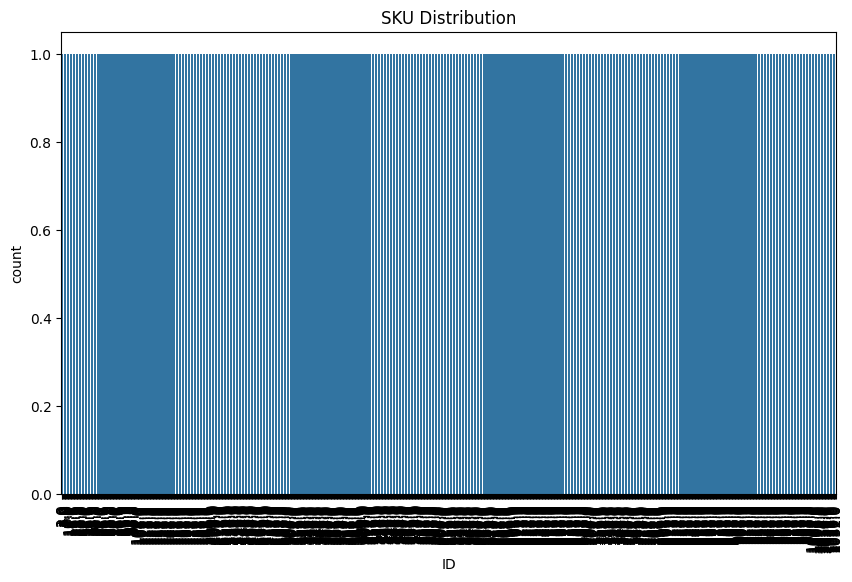

In [12]:
# SKU distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='ID')
plt.xticks(rotation=90)
plt.title('SKU Distribution')
plt.show()

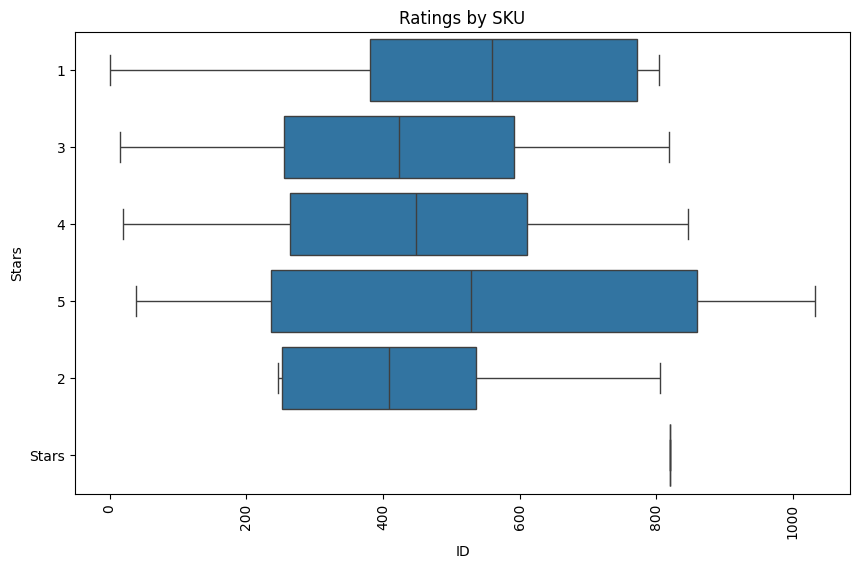

In [13]:
# SKU vs Ratings
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='ID', y='Stars')
plt.xticks(rotation=90)
plt.title('Ratings by SKU')
plt.show()

Timeline Analysis

In [14]:
def parse_date(date_str):
    for fmt in ('%d-%m-%Y', '%Y-%m-%d', '%m-%d-%Y'):
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            continue
    return pd.NaT


In [15]:
df['Date'] = df['Date'].apply(parse_date)

In [16]:
missing_dates = df[df['Date'].isna()]

In [17]:
df = df.dropna(subset=['Date'])

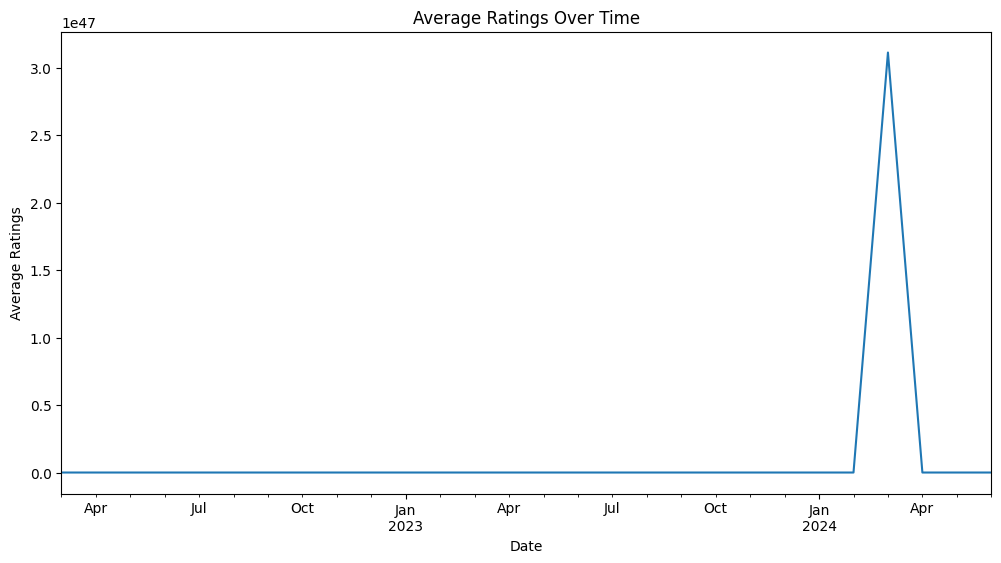

In [18]:
plt.figure(figsize=(12, 6))
df.groupby(df['Date'].dt.to_period('M'))['Stars'].mean().plot(kind='line')
plt.title('Average Ratings Over Time')
plt.xlabel('Date')
plt.ylabel('Average Ratings')
plt.show()

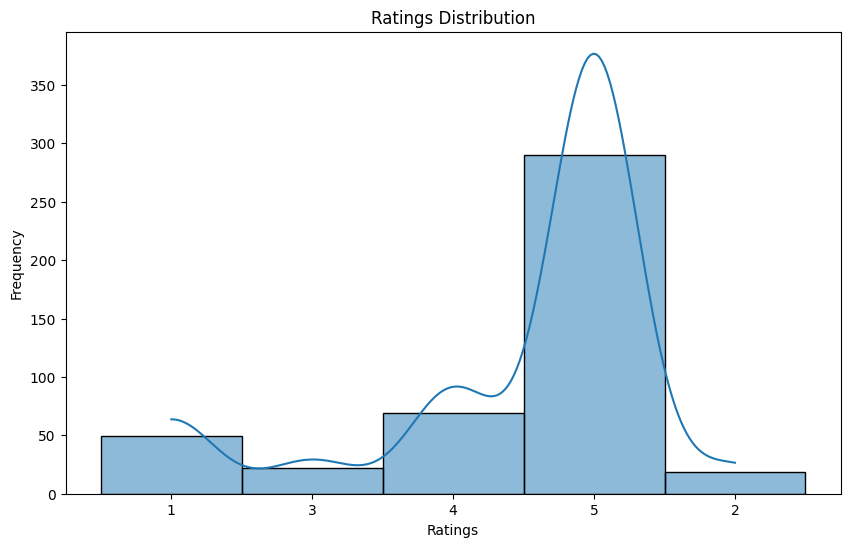

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Stars'], bins=10, kde=True)
plt.title('Ratings Distribution')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

WORD CLOUD

In [20]:
from wordcloud import WordCloud

In [21]:
text = " ".join(review for review in df['Description'].astype(str) if review != 'nan')

In [22]:
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

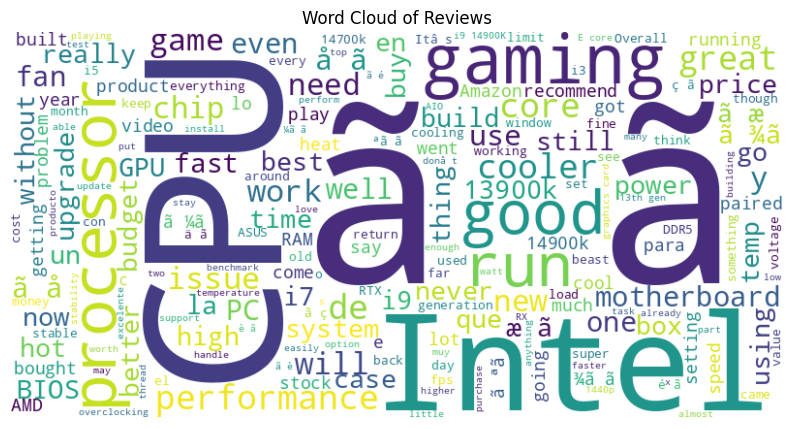

In [23]:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

In [28]:
try:
    df2 = pd.read_csv(path+'/13GEN.csv', encoding='utf-8')
except UnicodeDecodeError:
    df2 = pd.read_csv(path+'/13GEN.csv', encoding='ISO-8859-1')
print(df.shape)

(449, 6)


In [29]:
df2.head(500)

,ID,Name,Stars,Title,Date,Description
0,1.0,Yeng,1,DO NOT GET,NaN,i'd say donât get this unless you want your ...
1,2.0,Amazon User,1,Crashes frequently,NaN,CPU crashed frequently on my Asus Strix ROG Z7...
2,3.0,Old Audio Nut,1,It came USED.,NaN,"The box was opened, the i5 sticker was missing..."
3,4.0,Andre in the north,1,Product never worked after installation,NaN,Product never worked after finally building sy...
4,5.0,Jypsy Martin,1,Product was defect,NaN,I returned it and ask for a refund the 6 of Oc...
...,...,...,...,...,...,...
495,496.0,FloncH,5,Por ahora perfecto,NaN,"For now, the processor is performing everythin..."
496,497.0,L&S,5,I7 13900KF,NaN,Juste incroyable rien a dire de plus
497,498.0,artyz,5,TrÃ¨s performant,NaN,"Very efficient processor in gaming,"
498,499.0,Andrii Sobol,5,"Good product, great quality.",NaN,"Good product, great quality."


In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [31]:
print(df2.describe())

               ID
count  777.000000
mean   389.000000
std    224.444871
min      1.000000
25%    195.000000
50%    389.000000
75%    583.000000
max    777.000000


In [32]:
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           777 non-null    float64
 1   Name         778 non-null    object 
 2   Stars        777 non-null    object 
 3   Title        777 non-null    object 
 4   Date         2 non-null      object 
 5   Description  777 non-null    object 
dtypes: float64(1), object(5)
memory usage: 36.6+ KB
None


In [33]:
print(df2.isnull().sum())

ID               1
Name             0
Stars            1
Title            1
Date           776
Description      1
dtype: int64


# SKUs Analysis

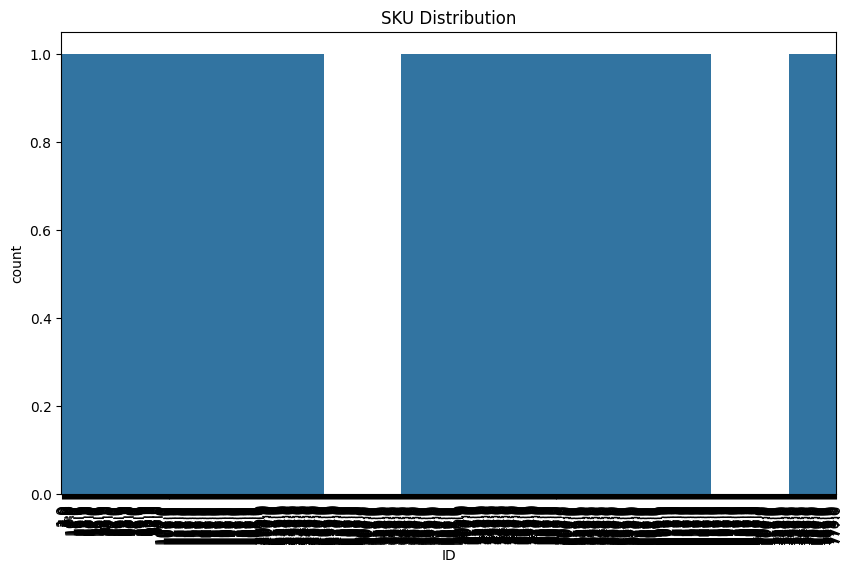

In [34]:
# SKU distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df2, x='ID')
plt.xticks(rotation=90)
plt.title('SKU Distribution')
plt.show()

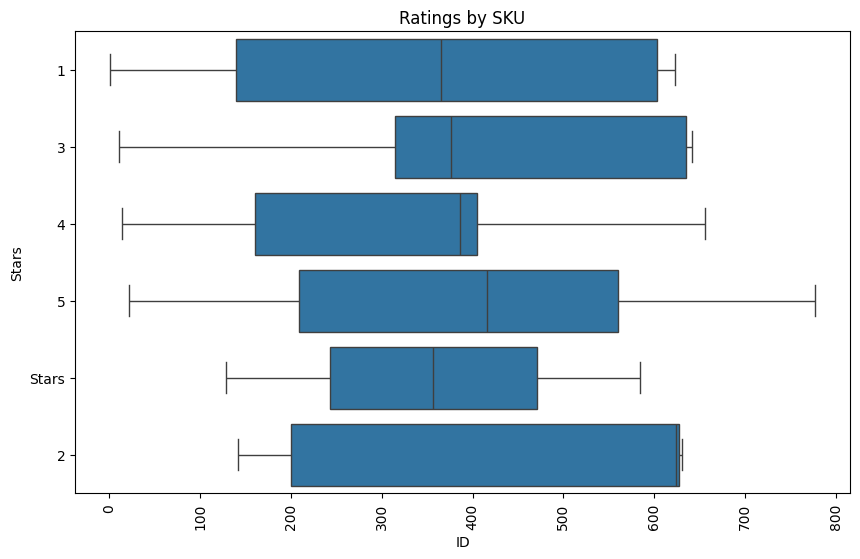

In [35]:
# SKU vs Ratings
plt.figure(figsize=(10, 6))
sns.boxplot(data=df2, x='ID', y='Stars')
plt.xticks(rotation=90)
plt.title('Ratings by SKU')
plt.show()